In [1]:
import numpy as np
import pandas as pd
from pandas import *
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../input/creditcard.csv")
data.head()
# Primera lección aprendida, windows puede no escribir las extensiones y el nombre es diferente

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Text(0, 0.5, 'Frecuencia')

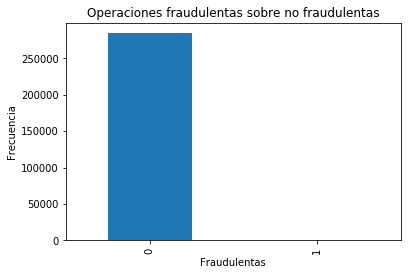

In [3]:
# Contamos cuantas operaciones son verdaderas >>> 0, y cuantas son falsas >>>> 1

count_classes = pd.value_counts(data['Class'], sort = False)
# Método válido para clasificar cuando hay pocas categorias 
# count_classes es una serie
count_classes.plot (kind='bar')
plt.title ("Operaciones fraudulentas sobre no fraudulentas")
plt.xlabel ("Fraudulentas")
plt.ylabel ("Frecuencia")


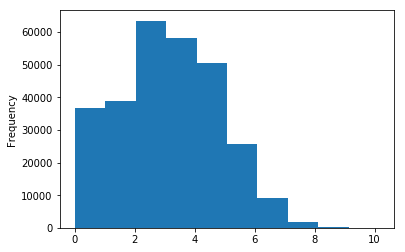

In [4]:
# Pueden aplicarse formulas sobre las columnas de un Data Frame
data['logAmount'] = np.log(data['Amount']+1)
# Para después dibujar un histograma
data['logAmount'].sort_values().plot.hist()

In [5]:
# Escalamos la variable amount  

from sklearn.preprocessing import StandardScaler
data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape (-1,1))
data = data.drop (['Time', 'Amount','logAmount'], axis = 1);


In [6]:
# Separamos los datos en dos arrays, uno con las variables X y otro con las variables y
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']
len(y[y.Class ==1]);

In [7]:
# Resampling --> Para casos en los que el sistema está desbalanceado como éste

#  - Undersampling --> Eliminar casos del tipo mayoritario
#  - Oversampling -->  Replicar de forma sintética los casos minoritarios
#  - SMOTE --> Una técnica combinación de las dos anteriores 

# Contamos el número de casos de fraude que existen ¡¡
number_records_fraud = len (data[data.Class==1])
# Y extraemmos los índices donde están los casos de fraude y los de no fraude
fraud_indices = np.array (data[data.Class==1].index)
normal_indices = np.array (data[data.Class==0].index)

In [8]:
# Obtenemos de forma aleatoria un número de indices de no fraude, igual al de fraude
random_normal_indices = np.random.choice (normal_indices, number_records_fraud, replace = False )
# Unimos en un solo array los indices de fraude con los de no fraude escogidos aleatoriamente
under_sample_indices = np.concatenate ([fraud_indices, random_normal_indices])


In [9]:
# Ahora escogemos los valores de dichos indices
under_sample_data = data.iloc[under_sample_indices,:]
# Separamos la X de la y de nuevo
X_undersample = under_sample_data.iloc [:, under_sample_data.columns != 'Class'];
y_undersample = under_sample_data.iloc [:, under_sample_data.columns == 'Class'];

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.3, random_state = 0)
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split (X_undersample,y_undersample, test_size = 0.3, random_state = 0)

In [11]:
from sklearn.metrics import recall_score
from sklearn.neural_network import MLPClassifier

In [12]:
MLPC = MLPClassifier(hidden_layer_sizes=(200,), max_iter=10000)
MLPC.fit(X_train_under, y_train_under)
y_pred = MLPC.predict(X_test)
# Obtenemos valores de recall
recall_acc = recall_score (y_test,y_pred)
recall_acc 

/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9659863945578231